In [96]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of functional predictions
Normalized score for each kegg ortholog are obtained for each OTU using FunFun. The result is a dataframe showing a normalized functionality score for each kegg ortholog per OTU. All columns (OTUs) sum up to 1. 78.99 % of OTUs got annotated.

In [ ]:
! funfun -its dna-sequences.fasta -type its1

## Analysis outside of qiime
### Read in data
After FunFun was run, the resulting data is read in as well as the feature table mapping the OTUs to samples. The read in data frames are transformed to long format to simplify the subsequent calculation of functionality scores per sample.

In [42]:
feature_table = pd.read_csv('data/feature-table.tsv', sep = "\t", header = 1)
feature_table.head()

,#OTU ID,SRR10505051,SRR10505052,SRR10505053,SRR10505054,SRR10505055,SRR10505056,SRR10505057,SRR10505058,SRR10505059,...,SRR10505146,SRR10505147,SRR10505148,SRR10505149,SRR10505150,SRR10505151,SRR10505152,SRR10505153,SRR10505154,SRR10505155
0,SH1135439.10FU_DQ641243_reps,0.0,13.0,18.0,4.0,0.0,567.0,14.0,0.0,163.0,...,3256.0,7163.0,22.0,271.0,0.0,136.0,19.0,0.0,0.0,0.0
1,SH1135454.10FU_DQ641241_reps,0.0,7.0,91.0,0.0,0.0,74.0,11.0,0.0,32.0,...,147.0,438.0,52.0,263.0,0.0,584.0,133.0,5.0,7.0,3.0
2,SH1305966.10FU_MK128991_reps,0.0,4.0,99.0,5.0,92.0,296.0,13.0,2.0,90.0,...,4932.0,3943.0,28.0,121.0,0.0,149.0,9.0,4.0,16.0,13.0
3,SH1223455.10FU_OL895300_reps,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
4,SH1094795.10FU_FR865733_reps,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
features_long = pd.melt(feature_table, id_vars='#OTU ID', var_name='sample', value_name='count')
features_long.rename(columns = {'#OTU ID': 'otu_id'}, inplace = True)
features_long.head()

,otu_id,sample,count
0,SH1135439.10FU_DQ641243_reps,SRR10505051,0.0
1,SH1135454.10FU_DQ641241_reps,SRR10505051,0.0
2,SH1305966.10FU_MK128991_reps,SRR10505051,0.0
3,SH1223455.10FU_OL895300_reps,SRR10505051,0.0
4,SH1094795.10FU_FR865733_reps,SRR10505051,0.0


In [58]:
funfun = pd.read_csv('data/FunFun_output/results.tsv', sep="\t")
funfun = funfun.set_index('Function')
funfun = funfun.T
funfun_long = pd.melt(funfun.reset_index(), id_vars = 'index', var_name = 'kegg_ortholog', value_name = 'norm_function')
funfun_long.rename(columns = {'index': 'otu_id'}, inplace = True)
funfun_long.head()


,otu_id,kegg_ortholog,norm_function
0,SH1049518.10FU_KM231814_refs,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0
1,SH1049934.10FU_JX352363_reps,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0
2,SH1050016.10FU_JX348613_reps,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0
3,SH1051547.10FU_KY449061_refs,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0
4,SH1053082.10FU_KY104486_refs,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0


### Calculate functionality scores for samples
The dataframes are merged and functionality scores are calculated per sample. The abundance of every OTU in each sample is multiplied by its functionality score obtained by FunFun and the scores are summed up grouped by sample and kegg ortholog.

In [61]:
merged = pd.merge(funfun_long, features_long, on="otu_id")
merged['weighted_function_score'] = merged['count'] * merged['norm_function']
merged.head()

,otu_id,kegg_ortholog,norm_function,sample,count,weighted_function_score
0,SH1049518.10FU_KM231814_refs,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0,SRR10505051,0.0,0.0
1,SH1049518.10FU_KM231814_refs,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0,SRR10505052,0.0,0.0
2,SH1049518.10FU_KM231814_refs,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0,SRR10505053,0.0,0.0
3,SH1049518.10FU_KM231814_refs,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0,SRR10505054,0.0,0.0
4,SH1049518.10FU_KM231814_refs,00943 Isoflavonoid biosynthesis [PATH:ko00943],0.0,SRR10505055,0.0,0.0


In [73]:
sample_function_profiles = merged.groupby(["sample", "kegg_ortholog"])["weighted_function_score"].sum().reset_index()
sample_function_profiles = sample_function_profiles.pivot(index='sample', columns='kegg_ortholog', values='weighted_function_score')
sample_function_profiles.index.name = None
sample_function_profiles.head()

kegg_ortholog,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],00020 Citrate cycle (TCA cycle) [PATH:ko00020],00030 Pentose phosphate pathway [PATH:ko00030],00040 Pentose and glucuronate interconversions [PATH:ko00040],00051 Fructose and mannose metabolism [PATH:ko00051],00052 Galactose metabolism [PATH:ko00052],00053 Ascorbate and aldarate metabolism [PATH:ko00053],00061 Fatty acid biosynthesis [PATH:ko00061],00062 Fatty acid elongation [PATH:ko00062],00071 Fatty acid degradation [PATH:ko00071],...,99987 Cofactor metabolism,99988 Secondary metabolism,99992 Structural proteins,99993 Cell motility,99994 Others,99995 Signaling proteins,99996 General function prediction only,99997 Function unknown,99998 Others,99999 Others
SRR10505051,106.973221,65.023406,54.406231,20.970348,54.847626,44.467162,21.297548,38.206825,18.072765,56.037311,...,9.635444,0.040825,2.336128,0.000993,0.335567,14.977763,12.327423,35.615345,0.0,1.838907
SRR10505052,46.792478,25.467655,21.423511,7.959803,20.676700,20.583210,7.641609,12.121299,4.590025,15.036160,...,3.253632,0.128806,0.940997,0.000226,0.300886,4.483176,4.396746,13.050220,0.0,0.495570
SRR10505053,423.467417,427.712283,291.398872,145.972817,164.987312,67.574760,34.834420,171.192508,49.195954,260.325415,...,0.753846,0.865538,0.132761,0.000537,0.197599,64.756003,32.585434,58.945346,0.0,0.152221
SRR10505054,2.271890,1.568494,1.211970,0.513570,1.286524,0.898099,0.513809,0.954270,0.489245,1.506292,...,0.222953,0.015922,0.049082,0.000000,0.001165,0.396615,0.304883,0.810961,0.0,0.049740
SRR10505055,9.019479,5.589131,4.633993,2.142346,4.653513,3.683928,1.923371,3.322497,1.420067,4.876952,...,0.718902,0.146632,0.194245,0.000000,0.056279,1.231640,0.991283,2.866672,0.0,0.152990


In [127]:
sample_function_profiles.to_csv('sample_function_profiles.tsv', sep='\t', index=True)

### PCA
Apply PCA to visualize the functionality scores for each sample and look at the distribution of different metadata.

In [106]:
# z-transform data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(sample_function_profiles)

# run PCA
pca = PCA()
pca_result = pca.fit_transform(normalized_data)

pca.explained_variance_ratio_[:5]

array([0.79650722, 0.08307006, 0.02092931, 0.0174762 , 0.0145038 ])

In [78]:
pca_df = pd.DataFrame(data=pca_result[:,0:2], columns=['PC1', 'PC2'], index=sample_function_profiles.index)
pca_df.head()

,PC1,PC2
SRR10505051,-3.652068,-1.202921
SRR10505052,-8.063844,-0.422799
SRR10505053,6.254359,-1.881323
SRR10505054,-10.139948,-0.060524
SRR10505055,-9.744864,-0.091685


In [120]:
metadata = pd.read_csv('data/pundemic_metadata_subgroup_response_all.tsv', sep = '\t')
metadata = metadata.set_index('id')
metadata.index.name = None
metadata.head()

,patient_id,age,sex,ethnicity,continent,country,region,city,group,disease_subgroup,blinded_clinical_response,puns_per_hour_pre_treatment,puns_per_hour_post_treatment,time_point,subgroup_response,disease_status
SRR10505051,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,post-treatment,Placebo_NR,Puns
SRR10505052,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,pre-treatment,Placebo_NR,Puns
SRR10505053,1045,29.0,male,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,Res,6.0,0.0,pre-treatment,Placebo_Res,Puns
SRR10505054,1045,29.0,male,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,Res,6.0,0.0,post-treatment,Placebo_Res,Healed
SRR10505055,1044,34.0,male,Indian Subcontinental,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NaN,4.0,NaN,pre-treatment,NaN,Puns


In [95]:
sample_data = pd.concat([pca_df, metadata], axis = 1)
sample_data.head()

,PC1,PC2,patient_id,age,sex,ethnicity,continent,country,region,city,group,disease_subgroup,blinded_clinical_response,puns_per_hour_pre_treatment,puns_per_hour_post_treatment,time_point,subgroup_response,disease_status
SRR10505051,-3.652068,-1.202921,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,post-treatment,Placebo_NR,Puns
SRR10505052,-8.063844,-0.422799,1048,36.0,female,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NR,9.0,8.0,pre-treatment,Placebo_NR,Puns
SRR10505053,6.254359,-1.881323,1045,29.0,male,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,Res,6.0,0.0,pre-treatment,Placebo_Res,Puns
SRR10505054,-10.139948,-0.060524,1045,29.0,male,Caucasian,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,Res,6.0,0.0,post-treatment,Placebo_Res,Healed
SRR10505055,-9.744864,-0.091685,1044,34.0,male,Indian Subcontinental,Europe,Switzerland,Zurich,Zurich,Puns,Placebo,NaN,4.0,NaN,pre-treatment,NaN,Puns


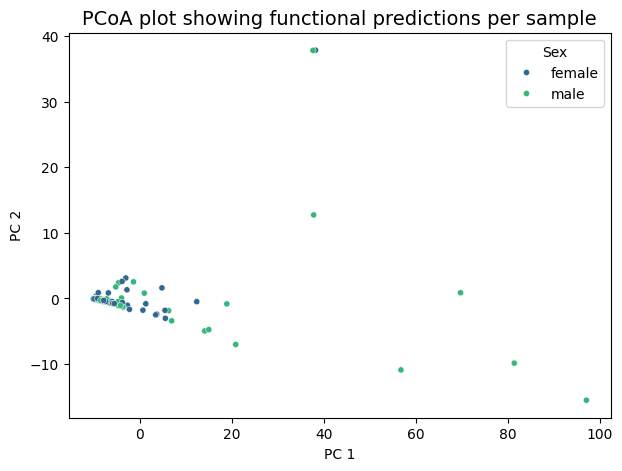

In [103]:
# Distribution by Sex

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=sample_data,
    x='PC1',
    y='PC2',
    hue='sex',  # Color by the metadata column
    palette='viridis',  # Choose a color palette
    s=20  # Marker size
)

# Add labels and title
plt.title('PCoA plot showing functional predictions per sample', fontsize=14)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Sex')


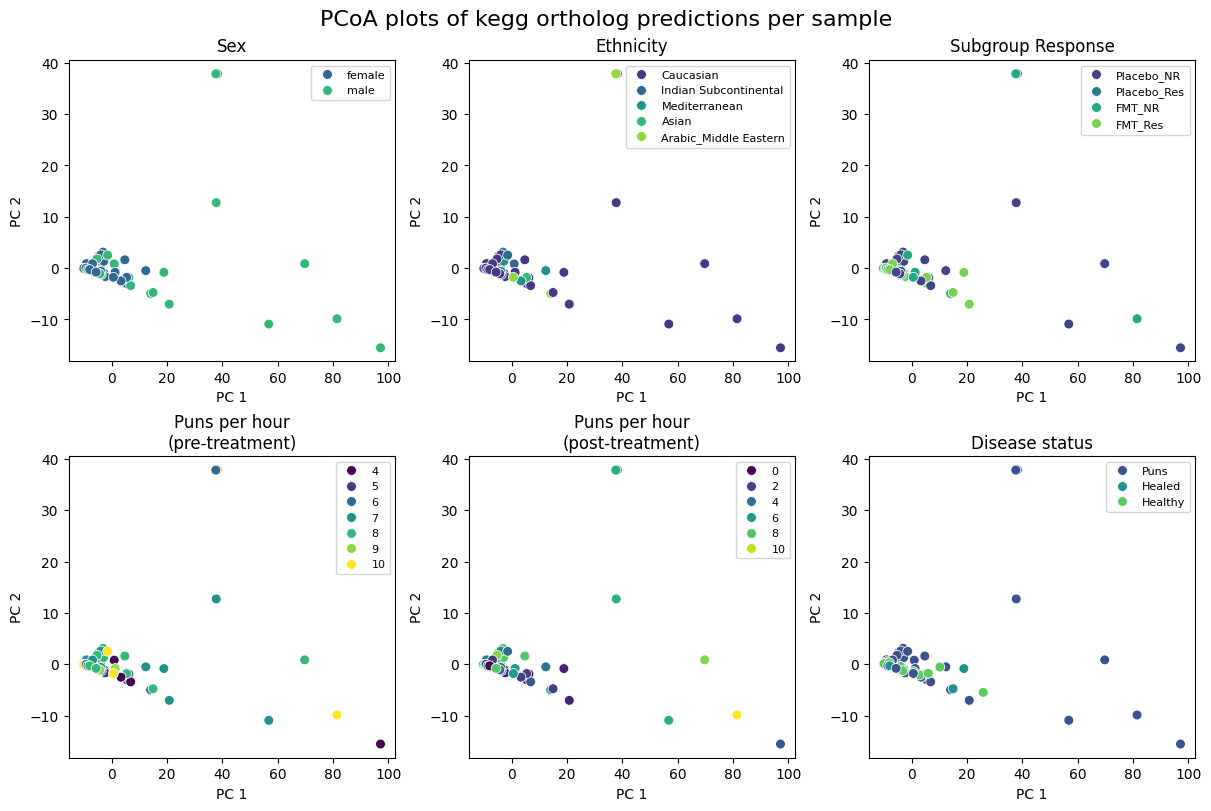

In [119]:
# Metadata columns to use for coloring
metadata_columns = ['sex', 'ethnicity', 'subgroup_response', 'puns_per_hour_pre_treatment', 'puns_per_hour_post_treatment', 'disease_status']
col_names = ['Sex', 'Ethnicity', 'Subgroup Response', 'Puns per hour\n(pre-treatment)', 'Puns per hour\n(post-treatment)', 'Disease status']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each subplot
for i, meta in enumerate(metadata_columns):
    sns.scatterplot(
        data=sample_data,
        x='PC1',
        y='PC2',
        hue=meta,
        palette='viridis',
        s=50,
        ax=axes[i]
    )
    axes[i].set_title(f'{col_names[i]}', fontsize=12)
    axes[i].set_xlabel('PC 1')
    axes[i].set_ylabel('PC 2')
    #axes[i].legend(title=col_names[i], fontsize=8)
    axes[i].legend(title=None, fontsize=8)

# Show the plot
plt.suptitle('PCoA plots of kegg ortholog predictions per sample', fontsize=16)
plt.show()


## Back to qiime

In [3]:
import qiime2 as q2
from qiime2 import Visualization
import pandas as pd

data_dir = 'data'
data_dir_fun = 'data/functional_prediction'

In [9]:
sample_function_profiles = pd.read_csv(f'{data_dir_fun}/sample_function_profiles.tsv', sep = '\t')
sample_function_profiles = sample_function_profiles.set_index('Unnamed: 0')
sample_function_profiles.index.name = None
sample_function_profiles.head()

,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],00020 Citrate cycle (TCA cycle) [PATH:ko00020],00030 Pentose phosphate pathway [PATH:ko00030],00040 Pentose and glucuronate interconversions [PATH:ko00040],00051 Fructose and mannose metabolism [PATH:ko00051],00052 Galactose metabolism [PATH:ko00052],00053 Ascorbate and aldarate metabolism [PATH:ko00053],00061 Fatty acid biosynthesis [PATH:ko00061],00062 Fatty acid elongation [PATH:ko00062],00071 Fatty acid degradation [PATH:ko00071],...,99987 Cofactor metabolism,99988 Secondary metabolism,99992 Structural proteins,99993 Cell motility,99994 Others,99995 Signaling proteins,99996 General function prediction only,99997 Function unknown,99998 Others,99999 Others
SRR10505051,106.973221,65.023406,54.406231,20.970348,54.847626,44.467162,21.297548,38.206825,18.072765,56.037311,...,9.635444,0.040825,2.336128,0.000993,0.335567,14.977763,12.327423,35.615345,0.0,1.838907
SRR10505052,46.792478,25.467655,21.423511,7.959803,20.676700,20.583210,7.641609,12.121299,4.590025,15.036160,...,3.253632,0.128806,0.940997,0.000226,0.300886,4.483176,4.396746,13.050220,0.0,0.495570
SRR10505053,423.467417,427.712283,291.398872,145.972817,164.987312,67.574760,34.834420,171.192508,49.195954,260.325415,...,0.753846,0.865538,0.132761,0.000537,0.197599,64.756003,32.585434,58.945346,0.0,0.152221
SRR10505054,2.271890,1.568494,1.211970,0.513570,1.286524,0.898099,0.513809,0.954270,0.489245,1.506292,...,0.222953,0.015922,0.049082,0.000000,0.001165,0.396615,0.304883,0.810961,0.0,0.049740
SRR10505055,9.019479,5.589131,4.633993,2.142346,4.653513,3.683928,1.923371,3.322497,1.420067,4.876952,...,0.718902,0.146632,0.194245,0.000000,0.056279,1.231640,0.991283,2.866672,0.0,0.152990


In [10]:
feature_table = q2.Artifact.import_data('FeatureTable[Frequency]', sample_function_profiles)

In [11]:
feature_table.save(f'{data_dir_fun}/sample_function_profiles.qza')

'data/functional_prediction/sample_function_profiles.qza'

## Beta diversity on functional predictions

In [12]:
! qiime diversity alpha-rarefaction \
    --i-table $data_dir_fun/sample_function_profiles.qza \
    --p-max-depth 10000 \
    --m-metadata-file $data_dir/pundemic_metadata.tsv \
    --o-visualization $data_dir_fun/alpha_rarefaction.qzv


Saved Visualization to: data/functional_prediction/alpha_rarefaction.qzv


In [13]:
Visualization.load(f"{data_dir_fun}/alpha_rarefaction.qzv")

<visualization: Visualization uuid: f95748e5-0894-479c-abed-bd1491705438>

In [14]:
! qiime diversity core-metrics \
  --i-table $data_dir_fun/sample_function_profiles.qza \
  --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
  --p-sampling-depth 3000 \
  --p-n-jobs 8 \
  --output-dir $data_dir_fun/core_metrics_results

Saved FeatureTable[Frequency] to: data/functional_prediction/core_metrics_results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: data/functional_prediction/core_metrics_results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: data/functional_prediction/core_metrics_results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: data/functional_prediction/core_metrics_results/evenness_vector.qza
Saved DistanceMatrix to: data/functional_prediction/core_metrics_results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: data/functional_prediction/core_metrics_results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: data/functional_prediction/core_metrics_results/jaccard_pcoa_results.qza
Saved PCoAResults to: data/functional_prediction/core_metrics_results/bray_curtis_pcoa_results.qza
Saved Visualization to: data/functional_prediction/core_metrics_results/jaccard_emperor.qzv
Saved Visualization to: data/functional_prediction/core_metrics_results/bray_curtis_

In [15]:
Visualization.load(f"{data_dir_fun}/core_metrics_results/bray_curtis_emperor.qzv")

<visualization: Visualization uuid: c36f5a61-4804-4921-aec5-a61ee9f65c74>

In [16]:
Visualization.load(f"{data_dir_fun}/core_metrics_results/jaccard_emperor.qzv")

<visualization: Visualization uuid: 2c63e656-f874-4d1d-9ffb-d68f43c76892>

The emperor plots show no trends for any of the metadata columns.

In [18]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_fun/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column disease_status \
    --p-pairwise \
    --o-visualization $data_dir_fun/core_metrics_results/bray_curtis-disease_status-significance.qzv

Saved Visualization to: data/functional_prediction/core_metrics_results/bray_curtis-disease_status-significance.qzv


In [19]:
Visualization.load(f"{data_dir_fun}/core_metrics_results/bray_curtis-disease_status-significance.qzv")

<visualization: Visualization uuid: 48860e1c-6a47-4264-aefe-b8f29704887e>

In [20]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_fun/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column disease_status \
    --p-pairwise \
    --o-visualization $data_dir_fun/core_metrics_results/jaccard-disease_status-significance.qzv

Saved Visualization to: data/functional_prediction/core_metrics_results/jaccard-disease_status-significance.qzv


In [21]:
Visualization.load(f"{data_dir_fun}/core_metrics_results/jaccard-disease_status-significance.qzv")

<visualization: Visualization uuid: 93e6f187-187d-4a8f-b8d6-635dbba8a33d>

Differentiating by disease status, no significant difference between healthy, healed and diseased (puns) was found

In [22]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_fun/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column sex \
    --p-pairwise \
    --o-visualization $data_dir_fun/core_metrics_results/bray_curtis-sex-significance.qzv

Saved Visualization to: data/functional_prediction/core_metrics_results/bray_curtis-sex-significance.qzv


In [23]:
Visualization.load(f"{data_dir_fun}/core_metrics_results/bray_curtis-sex-significance.qzv")

<visualization: Visualization uuid: 2f731fe8-2515-4ec0-b031-e9fa41eecf7e>

In [24]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_fun/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column sex \
    --p-pairwise \
    --o-visualization $data_dir_fun/core_metrics_results/jaccard-sex-significance.qzv

Saved Visualization to: data/functional_prediction/core_metrics_results/jaccard-sex-significance.qzv


In [25]:
Visualization.load(f"{data_dir_fun}/core_metrics_results/jaccard-sex-significance.qzv")

<visualization: Visualization uuid: c868f246-8204-443d-aca4-dac0226aa341>

No significant differences between sexes were found.

In [26]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_fun/core_metrics_results/bray_curtis_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column subgroup_response \
    --p-pairwise \
    --o-visualization $data_dir_fun/core_metrics_results/bray_curtis-subgroup_response-significance.qzv

Saved Visualization to: data/functional_prediction/core_metrics_results/bray_curtis-subgroup_response-significance.qzv


In [27]:
Visualization.load(f"{data_dir_fun}/core_metrics_results/bray_curtis-subgroup_response-significance.qzv")

<visualization: Visualization uuid: 70f0c3a3-1c38-4f3b-a26a-efbdb23a5c5e>

In [28]:
! qiime diversity beta-group-significance \
    --i-distance-matrix $data_dir_fun/core_metrics_results/jaccard_distance_matrix.qza \
    --m-metadata-file $data_dir/pundemic_metadata_subgroup_response_all.tsv \
    --m-metadata-column subgroup_response \
    --p-pairwise \
    --o-visualization $data_dir_fun/core_metrics_results/jaccard-subgroup_response-significance.qzv

Saved Visualization to: data/functional_prediction/core_metrics_results/jaccard-subgroup_response-significance.qzv


In [29]:
Visualization.load(f"{data_dir_fun}/core_metrics_results/jaccard-subgroup_response-significance.qzv")

<visualization: Visualization uuid: 4897583d-93ce-4ff5-8d10-f294341b5e68>

Comparing placebo response, placebo no response, FMT response and FMT no response no significant differences in beta diversity were found.